In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('ticks')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
import hddm
from scipy import integrate

def likelihood(rt, choice, drift, a=1, z=0.5, t=0):
    pdf = hddm.wfpt.full_pdf if np.shape(rt) is () else hddm.wfpt.pdf_array
#     assert a == 1 and z == 0.5 # haven't tested with these varying
    if choice != 1:
        rt = rt * -1
#         drift = -drift
    return pdf(rt - t, drift, 0, a, z, 0, t, 0, 1e-4, 0)

def choice_marginal(choice, drift, max_rt=10, **kws):
    return integrate.quad(lambda x: likelihood(x, choice, drift, **kws), 0, max_rt)[0]

def make_label(**kws):
    return ', '.join(f'{k} = {v}' for k, v in kws.items())

def plot_like(choice, drift, max_rt=1, conditional=False, **kws):
    rt = np.linspace(0, max_rt, 100)
    p_choice = choice_marginal(choice, drift, max_rt*10, **kws)
    lab = make_label(drift=drift, **kws) + f';  P(choice) = {p_choice:.2f}'
    pdf = likelihood(rt, choice, drift, **kws)
    if conditional:
        pdf /= p_choice
    plt.plot(rt, pdf, label=lab)
    plt.xlabel('RT')
    plt.ylabel('Probability density')
    plt.legend()
#     plt.title(f'P(choose {choice}) = {choice_marginal(choice, max_rt*10):.2f}')

In [129]:
# t, v, a, z = 0.3, 0.5, 2.0, 0.5
# likelihood(t, 0, v, a, z)
choice, rt, drift, threshold = 0, 0.2, 0.5, 1.5
bias = 0.7
for choice in 0,1:
    print(likelihood(rt, choice, drift, a=threshold, z=bias))


0.17128638474447533
1.4776600959600352


In [145]:
choice, rt, drift, threshold = 0, 0.2, 0.5, 1.5
%time integrate.quad(lambda x: likelihood(x, choice, drift, threshold, z=bias), 0, 10)

CPU times: user 1.67 ms, sys: 13 µs, total: 1.68 ms
Wall time: 1.69 ms


(0.820700943543273, 8.274368862485763e-09)

In [144]:
choice, rt, drift, threshold, bias = 1, 0.2, 1, 2, 0.1
rts = np.arange(1, 2.000001, 0.01, )
%time [likelihood(rts, choice, drift, a=threshold, z=bias)

CPU times: user 179 µs, sys: 23 µs, total: 202 µs
Wall time: 170 µs


array([0.23507823, 0.23189814, 0.22872775, 0.22556921, 0.22242452,
       0.21929554, 0.21618397, 0.2130914 , 0.2100193 , 0.20696902,
       0.20394179, 0.20093874, 0.19796091, 0.19500925, 0.19208462,
       0.18918778, 0.18631943, 0.1834802 , 0.18067065, 0.17789127,
       0.17514248, 0.17242467, 0.16973816, 0.16708321, 0.16446006,
       0.16186888, 0.15930981, 0.15678296, 0.15428839, 0.15182613,
       0.14939618, 0.14699852, 0.14463309, 0.1422998 , 0.13999856,
       0.13772924, 0.13549169, 0.13328575, 0.13111124, 0.12896795,
       0.12685568, 0.12477419, 0.12272326, 0.12070263, 0.11871205,
       0.11675123, 0.11481992, 0.11291781, 0.11104463, 0.10920006,
       0.10738382, 0.10559559, 0.10383505, 0.1021019 , 0.10039581,
       0.09871647, 0.09706355, 0.09543672, 0.09383566, 0.09226004,
       0.09070954, 0.08918383, 0.08768257, 0.08620544, 0.08475212,
       0.08332229, 0.0819156 , 0.08053175, 0.07917041, 0.07783127,
       0.07651399, 0.07521828, 0.07394381, 0.07269027, 0.07145

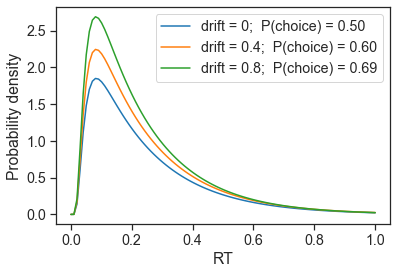

In [23]:
plot_like(1, drift=0)
plot_like(1, drift=0.4)
plot_like(1, drift=0.8)
# plot_pdf(1, drift=0.4)

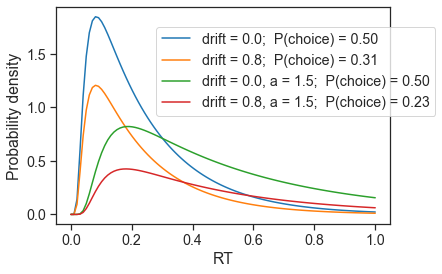

In [34]:
plot_like(0, drift=0.)
plot_like(0, drift=0.8)
plot_like(0, drift=0., a=1.5)
plot_like(0, drift=0.8, a=1.5)
plt.legend(loc=(0.3,0.5))
# Sanity check: these plots look the same
# plot_pdf(1, drift=0.)
# plot_pdf(1, drift=-0.8)
# plot_pdf(1, drift=0., a=1.5)
# plot_pdf(1, drift=-0.8, a=1.5)

Text(0.5, 1.0, 'Conditioned on choice')

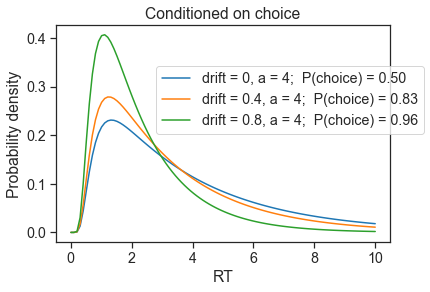

In [36]:
plot_like(1, a=4, drift=0, conditional=True, max_rt=10)
plot_like(1, a=4, drift=0.4, conditional=True, max_rt=10)
plot_like(1, a=4, drift=0.8, conditional=True, max_rt=10)
plt.legend(loc=(0.3,0.5))
plt.title("Conditioned on choice")

## Inference

In [55]:
def plot_posterior(rt, choice, max_drift=5, **kws):
    vs = np.linspace(-max_drift, max_drift, 100)
    like = np.array([likelihood(rt, choice, v, **kws) for v in vs])
    norm = integrate.quad(lambda drift: likelihood(rt, choice, drift, **kws), -100, 100)[0]
    plt.plot(vs, like / norm, label=make_label(rt=rt, choice=choice, **kws))
    plt.xlabel('Value Difference')
    plt.ylabel('Probability Density')
    plt.legend()

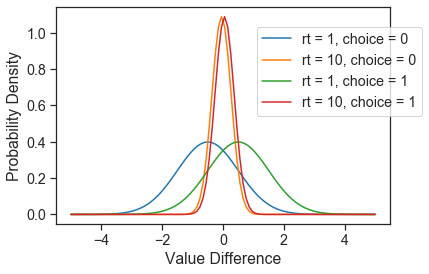

In [58]:
plot_posterior(1, 0)
plot_posterior(10, 0)
plot_posterior(1, 1)
plot_posterior(10, 1)
plt.legend(loc=(0.6,0.5))

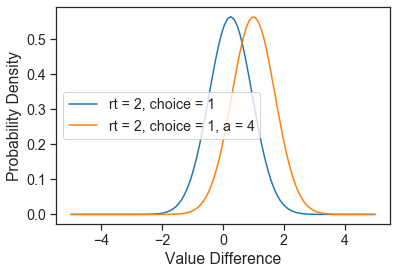

In [65]:
plot_posterior(2, 1)
plot_posterior(2, 1, a=4)